In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sns

import plotly
import plotly.figure_factory as ff

import statsmodels.api as sm

In [2]:
matplotlib.rcParams['figure.figsize'] = 14, 6 
plt.style.use('tableau-colorblind10')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
#pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
#matplotlib.rcParams.update(pgf_with_rc_fonts)
sns.set_palette(['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600'])

In [3]:
df = pd.read_csv('../data/cleaned/cleaned_data.csv', parse_dates=[0], dtype={'parish': 'category', 'region': 'category'})
df['date'] = df.date.dt.to_period('M')

# Only look until 2018 since 2019 is not over
df = df[df.date.dt.year < 2019]
df.head()

,date,parish,region,lat,lon,fips,event_count,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,highest_daily_total_precip,total_precip,avg_temp,mean_max_temp,mean_min_temp
0,1952-04,Acadia,Southwest,30.291497,-92.411037,22001,1.0,0.0,0.0,0.0,0.0,250000.0,3.410,8.560,63.9,74.5,53.2
1,1952-05,Acadia,Southwest,30.291497,-92.411037,22001,0.0,0.0,0.0,0.0,0.0,0.0,4.425,6.540,73.9,84.6,63.2
2,1952-06,Acadia,Southwest,30.291497,-92.411037,22001,0.0,0.0,0.0,0.0,0.0,0.0,0.795,1.820,82.3,92.5,72.1
3,1952-07,Acadia,Southwest,30.291497,-92.411037,22001,0.0,0.0,0.0,0.0,0.0,0.0,3.425,10.530,81.9,90.5,73.3
4,1952-08,Acadia,Southwest,30.291497,-92.411037,22001,0.0,0.0,0.0,0.0,0.0,0.0,0.565,1.375,82.4,91.4,73.3


In [4]:
storm_df = pd.read_csv('../data/cleaned/event_type_data.csv', parse_dates=[0])
storm_df['date'] = storm_df.date.dt.to_period('M')
storm_df.head()

,date,parish,region,fips,event_type,event_count,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property
0,1950-02,Bienville,Northwest,22013,Tornado,1,0,0,0,0,250000.0
1,1950-02,Bossier,Northwest,22015,Tornado,1,37,0,9,0,250000.0
2,1950-02,Caddo,Northwest,22017,Tornado,1,40,0,9,0,250000.0
3,1950-02,Claiborne,Northwest,22027,Tornado,1,10,0,5,0,250000.0
4,1950-02,De Soto,Northwest,22031,Tornado,2,0,0,0,0,500000.0


# Temperature
- As expected, the Southern regions generally have slightly higher temperatures overall with less variability than the other regions.

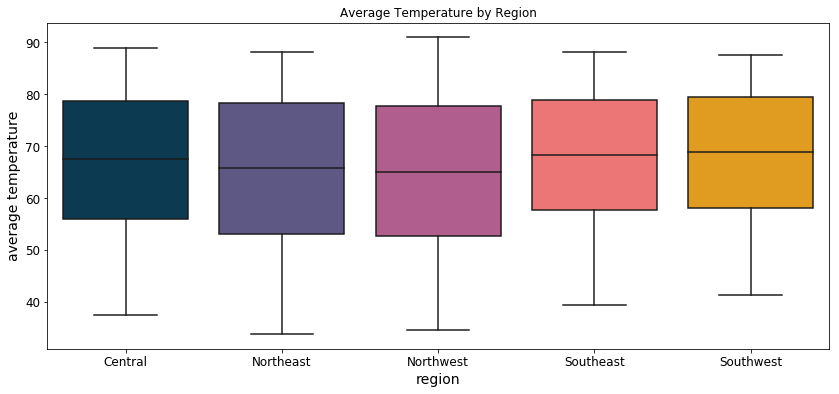

In [5]:
sns.boxplot(x='region', y='avg_temp', data=df)
plt.ylabel('average temperature')
_ = plt.title('Average Temperature by Region')

- Three outliers for Northeast

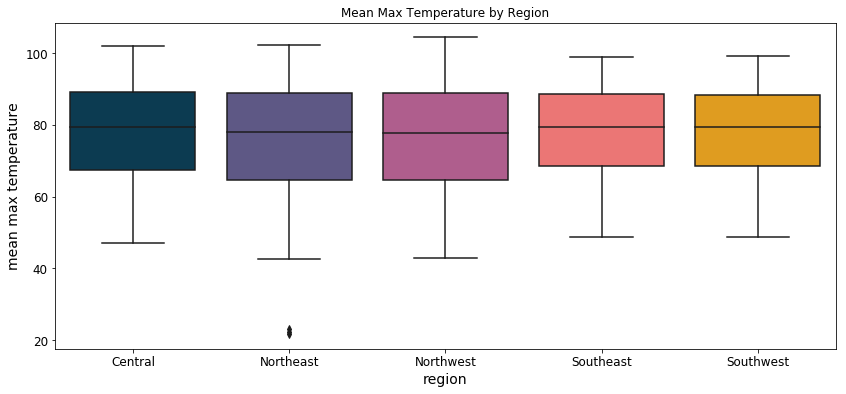

In [6]:
sns.boxplot(x='region', y='mean_max_temp', data=df)
plt.ylabel('mean max temperature')
_ = plt.title('Mean Max Temperature by Region')

- After further inspection, the mean max temperature is lower than than the mean min temperature.
- Assume accidental Celsius unit and convert to Fahrenheit

In [7]:
df[df.mean_max_temp < 40]

,date,parish,region,lat,lon,fips,event_count,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,highest_daily_total_precip,total_precip,avg_temp,mean_max_temp,mean_min_temp
7498,1966-04,Caldwell,Northeast,30.291497,-92.411037,22021,0.0,0.0,0.0,0.0,0.0,0.0,2.19,10.58,65.178947,22.3,53.342105
7503,1966-09,Caldwell,Northeast,30.291497,-92.411037,22021,0.0,0.0,0.0,0.0,0.0,0.0,1.50,3.15,77.177778,21.7,66.072222
7569,1972-03,Caldwell,Northeast,30.291497,-92.411037,22021,0.0,0.0,0.0,0.0,0.0,0.0,1.80,5.82,57.778947,23.2,46.036842


In [8]:
df.loc[[7433, 7438, 7504], 'mean_max_temp'] = df.loc[[7433, 7438, 7504], 'mean_max_temp'] * 1.8 + 32

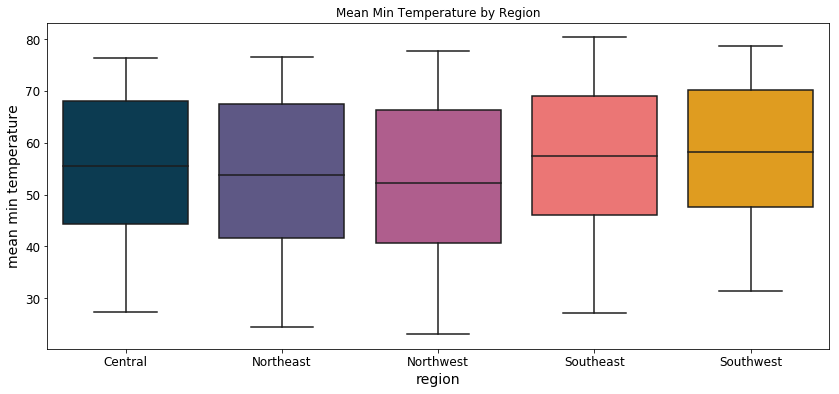

In [9]:
sns.boxplot(x='region', y='mean_min_temp', data=df)
plt.ylabel('mean min temperature')
_ = plt.title('Mean Min Temperature by Region')

# Precipitation
- There are many outliers, but they are likely attributed to rainy/hurricane seasons. 
- As expected, the Southern regions generally have slightly higher volumes of precipitation.

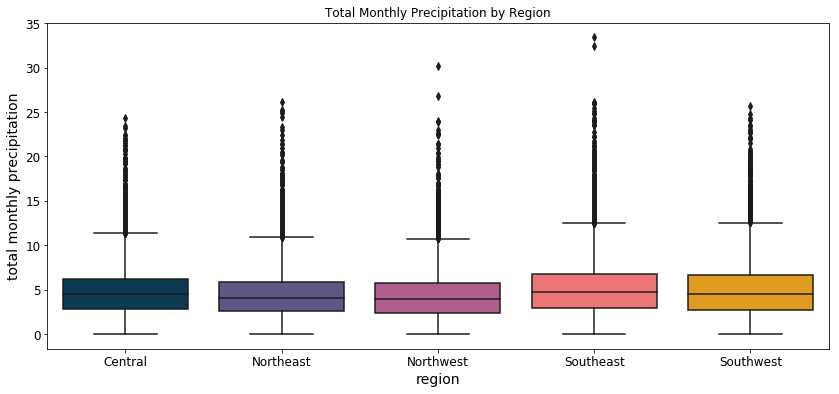

In [10]:
sns.boxplot(x='region', y='total_precip', data=df)
plt.ylabel('total monthly precipitation')
_ = plt.title('Total Monthly Precipitation by Region')

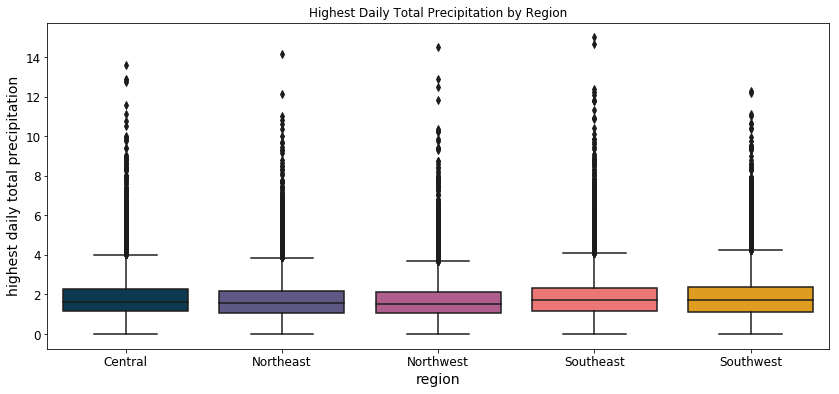

In [11]:
sns.boxplot(x='region', y='highest_daily_total_precip', data=df)
plt.ylabel('highest daily total precipitation')
_ = plt.title('Highest Daily Total Precipitation by Region')

# Total Yearly Event Count, Deaths, Injuries, and Property Damage
- There is an increasing trend in number of storm events with potentially interesting peaks during 1973-1975, 1983-1985, 2008, 2011, and 2015-2018. 
- The spikes in property damage and deaths were in 2005 when Hurricane Katrina devastated South Louisiana. 
- The second highest peak in property damage was in 2016 when there was a 1000-year flood in Central Louisiana. 
- Death count was generally low.

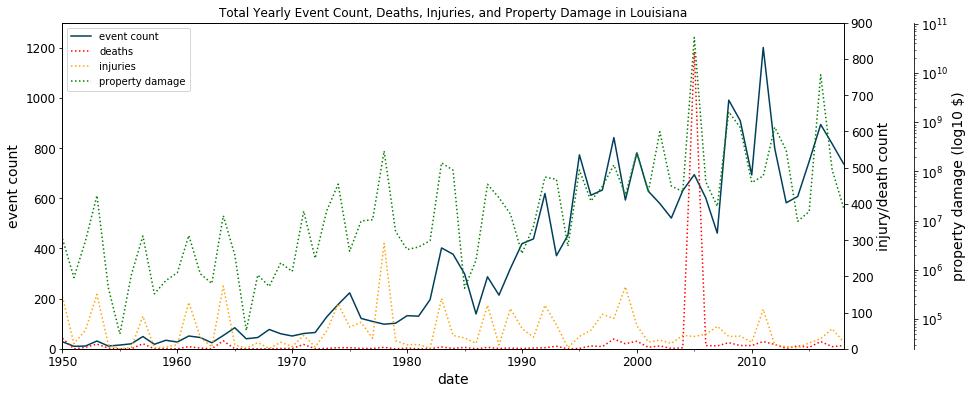

In [12]:
year_resample = df.set_index('date').resample('Y').sum()

fig, ax = plt.subplots()
year_resample['event_count'].plot(ax=ax, label='event count')
ax.set_ylabel('event count')
ax.set_ylim(0, 1300)

ax2 = ax.twinx()
deaths = year_resample.deaths_direct + year_resample.deaths_indirect
injuries = year_resample.injuries_direct + year_resample.injuries_indirect
deaths.plot(ax=ax2, color='red', linestyle=':', label='deaths')
injuries.plot(ax=ax2, color='orange', linestyle=':', label='injuries')
ax2.set_ylim(0, 900)
ax2.set_ylabel('injury/death count')

ax3 = ax.twinx()
year_resample['damage_property'].plot(ax=ax3, color='green', linestyle=':', logy=True, label='property damage')
ax3.spines['right'].set_position(('outward', 70)) 
ax3.set_ylabel('property damage (log10 $)')

plt.title('Total Yearly Event Count, Deaths, Injuries, and Property Damage in Louisiana')
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
_ = ax.legend(h1+h2+h3, l1+l2+l3)

## This leads me to ask the following questions:  
- What are the most common storm event types?
- Which event types have resulted in the most amount of property damage, injuries, and deaths?
- What could be the reason(s) for such a drastic change in the number of storm events from 1950 to now? 

### What are the most common storm event types?

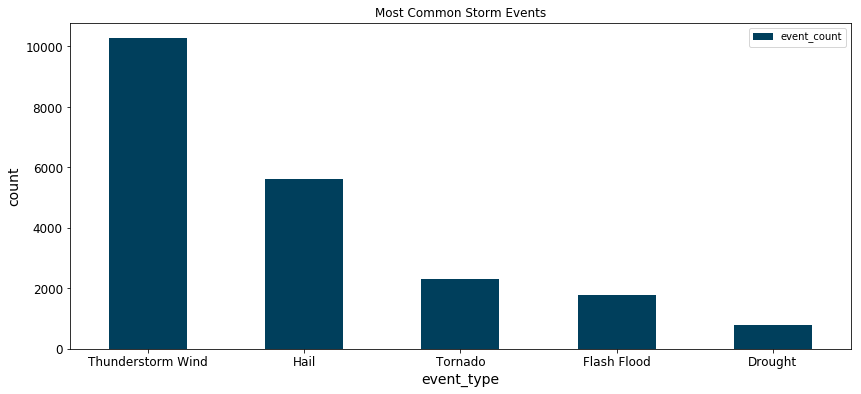

In [13]:
storm_df.groupby('event_type')[['event_count']].sum().sort_values(by='event_count', ascending=False)[:5] \
                                                     .plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.ylabel('count')
_ = plt.title('Most Common Storm Events')

### Which event types have resulted in the most amount of property damage, injuries, and deaths?

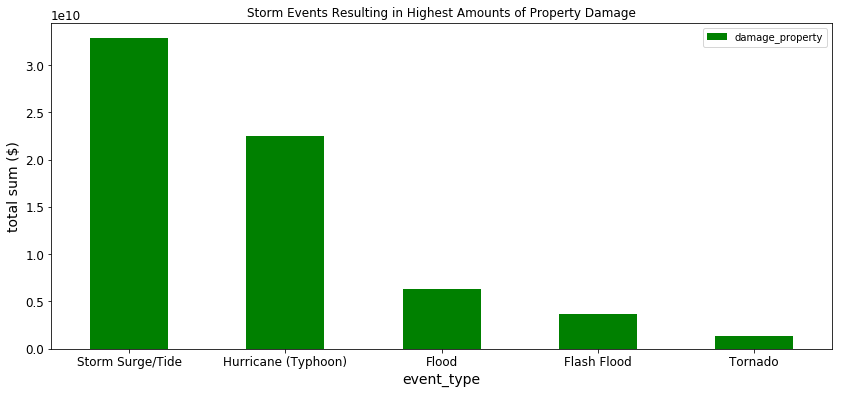

In [14]:
storm_df.groupby('event_type')[['damage_property']].sum().sort_values(by='damage_property', ascending=False)[:5] \
                                                         .plot(kind='bar', color='green')
plt.xticks(rotation='horizontal')
plt.ylabel('total sum ($)')
_ = plt.title('Storm Events Resulting in Highest Amounts of Property Damage')

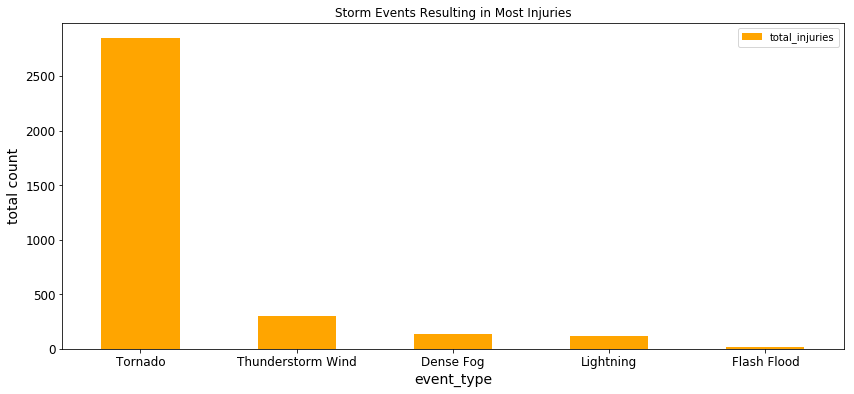

In [15]:
injuries_df = storm_df.groupby('event_type')[['injuries_indirect', 'injuries_direct']].sum()
injuries_df['total_injuries'] = injuries_df['injuries_indirect'] + injuries_df['injuries_direct']
injuries_df[['total_injuries']].sort_values(by='total_injuries', ascending=False)[:5].plot(kind='bar', color='orange')
plt.xticks(rotation='horizontal')
plt.ylabel('total count')
_ = plt.title('Storm Events Resulting in Most Injuries')

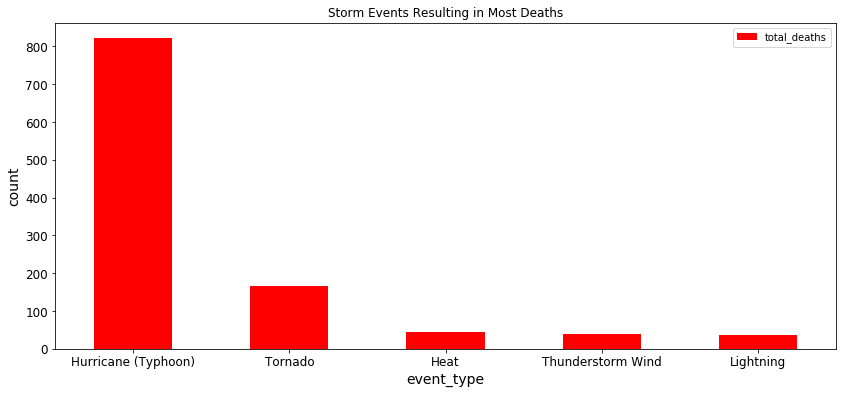

In [16]:
deaths_df = storm_df.groupby('event_type')[['deaths_indirect', 'deaths_direct']].sum()
deaths_df['total_deaths'] = deaths_df['deaths_indirect'] + deaths_df['deaths_direct']

deaths_df[['total_deaths']].sort_values(by='total_deaths', ascending=False)[:5].plot(kind='bar', color='red')
plt.xticks(rotation='horizontal')
plt.ylabel('count')
_ = plt.title('Storm Events Resulting in Most Deaths')

### What could be the reason(s) for such a drastic change in the number of storm events from 1950 to now?

[Source](https://www.ncdc.noaa.gov/stormevents/details.jsp):  
1. Tornado: From 1950 through 1954, only tornado events were recorded.

2. Tornado, Thunderstorm Wind and Hail: From 1955 through 1992, only tornado, thunderstorm wind and hail events were keyed from the paper publications into digital data. From 1993 to 1995, only tornado, thunderstorm wind and hail events have been extracted from the Unformatted Text Files.

3. All Event Types (48 from Directive 10-1605): From 1996 to present, 48 event types are recorded as defined in [NWS Directive 10-1605](https://www.ncdc.noaa.gov/stormevents/pd01016005curr.pdf).  

Note: For modeling purposes, it will be best to only use data from 1996 to present.

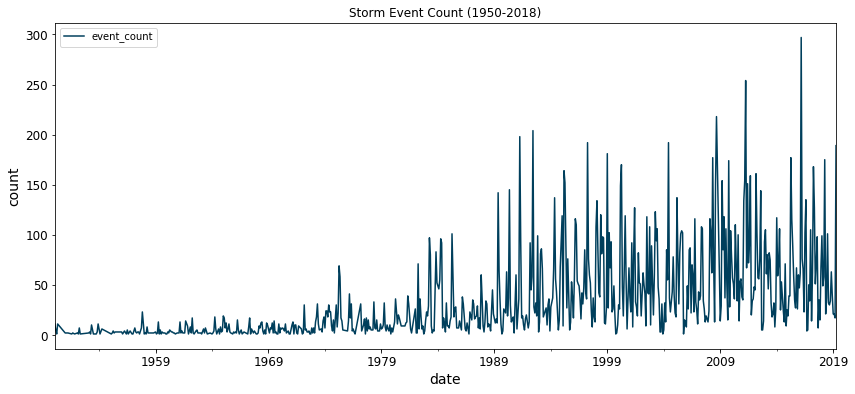

In [17]:
storm_df[['date', 'event_count']].groupby('date').sum().plot()
plt.ylabel('count')
_ = plt.title('Storm Event Count (1950-2018)')

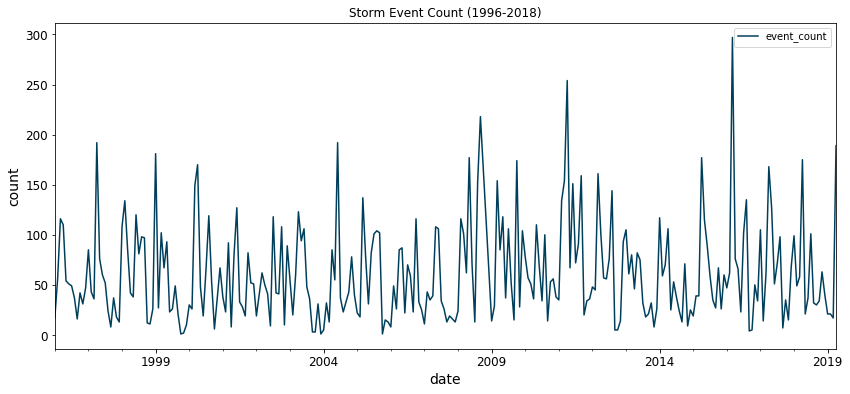

In [18]:
storm_df[storm_df.date.dt.year > 1995][['date', 'event_count']].groupby('date').sum().plot()
plt.ylabel('count')
_ = plt.title('Storm Event Count (1996-2018)')

# Yearly Event Count by Region
- Northwest Louisiana has consistently had the most number of storm events (with some exceptions) while Central Louisiana generally has had the least. 
- The trends are generally similar among all regions with Northwest Louisiana being the general exception. 

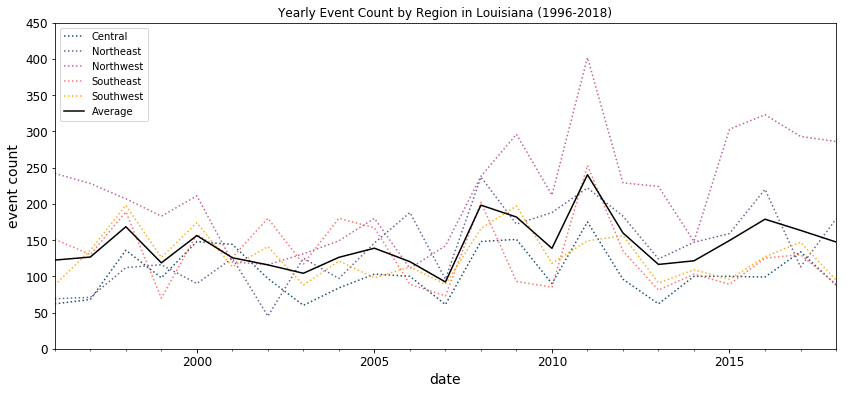

In [19]:
region_event = df[['date', 'region', 'event_count']].set_index('date') 
region_event = region_event[region_event.index.year > 1995].groupby('region') \
                                     .resample('Y').sum() \
                                     .unstack('region')

colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
fig, ax = plt.subplots()
for col, color in zip(region_event.columns, colors):
    region_event[col].plot(c=color, linestyle=':', alpha=0.90)
    
means = region_event.unstack().groupby('date').mean()
plt.plot(means, c='k')

ax.set_ylim(0, 450)
plt.title('Yearly Event Count by Region in Louisiana (1996-2018)')
plt.ylabel('event count')
_ = plt.legend(['Central', 'Northeast', 'Northwest', 'Southeast', 'Southwest', 'Average'])

## This leads me to ask the following questions:
- It is surprising that Northwest Louisiana consistently has the most number of storm events. What type of storm events are common for this region?
- What happened in Southeast Louisiana in 2002 and 2004?
- What happened in Northeast Louisiana in 2006?

### What type of storm events are common for Northwest Louisiana?

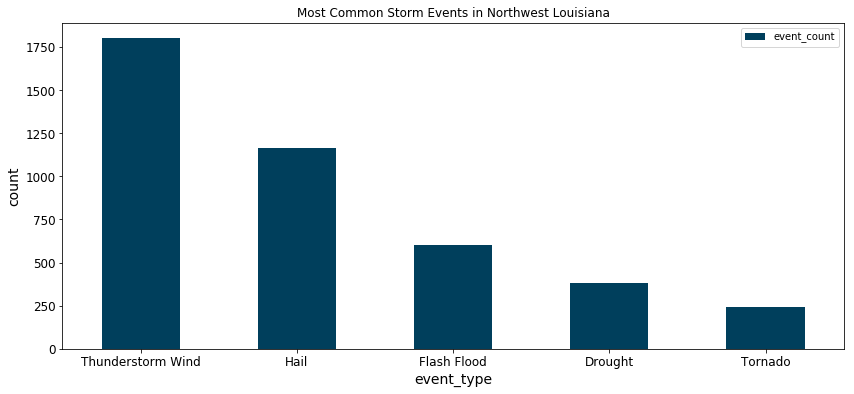

In [20]:
storm_df[(storm_df.region == 'Northwest') & (storm_df.date.dt.year > 1995)].groupby('event_type')[['event_count']] \
                                        .sum() \
                                        .sort_values(by='event_count', ascending=False)[:5].plot(kind='bar')
plt.ylabel('count')
plt.xticks(rotation='horizontal')
_ = plt.title('Most Common Storm Events in Northwest Louisiana')

### What happened in Southeast Louisiana in 2002?

In [21]:
# Key for color consistency for the following analysis
colors = ["#69ef7b", # drought
          "#344b46", # flash flood
          "#64d4fd", # flood
          "#7a2f9b", # funnel cloud
          "#048ad1", # hail
          "#fbacf6", # heat
          "#523d6e", # high wind
          "#93d5a9", # hurricane (typhoon)
          "#0b6d33", # ice storm
          "#b1d34f", # lightning
          "#d5082d", # storm surge/tide
          "#f4d16a", # strong wind
          "#2D2DB4", # thunderstorm wind
          "#eb957f", # tornado
          "#fe8f06", # tropical storm
          "#75887b", # winter storm
          "#d5d0fa"] # winter weather

In [22]:
storm_df[(storm_df.date.dt.year == 2002) & (storm_df.region == 'Southeast')].groupby('event_type')[['event_count']] \
                                                                          .sum() \
                                                                          .sort_values(by='event_count', 
                                                                                       ascending=False)

,event_count
event_type,
Thunderstorm Wind,76
Tropical Storm,33
Hurricane (Typhoon),19
Lightning,15
Flash Flood,11
Tornado,9
Winter Storm,8
Hail,6
High Wind,4


#### Of interest:
- **Winter storms** in January
- Relatively high number of **lightning** events in July
- High number of **thunderstorm winds** especially in July, but also noteable events in April and December. 
- **Tropical storms** in August and September
- **Huricanes** in October

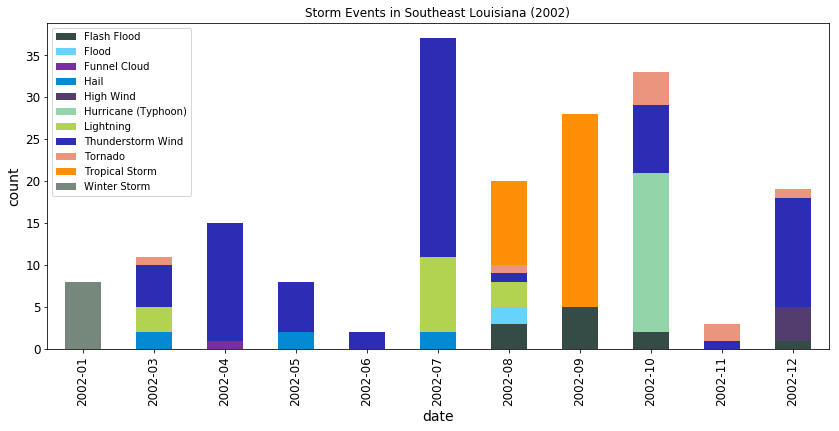

In [23]:
colors = ["#344b46", "#64d4fd", '#7a2f9b', '#048ad1', "#523d6e", "#93d5a9", "#b1d34f", "#2D2DB4", "#eb957f", 
          "#fe8f06", "#75887b"]
_ = storm_df[(storm_df.date.dt.year == 2002) & (storm_df.region == 'Southeast')].groupby(['date', 'event_type']) \
                                                                               [['event_count']].sum() \
                                                                              .unstack() \
                                                                              .plot(kind='bar', stacked=True, 
                                                                                    color=colors)
plt.ylabel('count')
plt.title('Storm Events in Southeast Louisiana (2002)')
_ = plt.legend(['Flash Flood', 'Flood', 'Funnel Cloud', 'Hail', 'High Wind', 'Hurricane (Typhoon)', 'Lightning', 
                'Thunderstorm Wind', 'Tornado', 'Tropical Storm', 'Winter Storm'])

### What happened in Southeast Louisiana in 2004?

In [24]:
storm_df[(storm_df.date.dt.year == 2004) & (storm_df.region == 'Southeast')].groupby('event_type')[['event_count']] \
                                                                          .sum() \
                                                                          .sort_values(by='event_count', 
                                                                                       ascending=False)

,event_count
event_type,
Thunderstorm Wind,69
Hail,21
Storm Surge/Tide,20
Tropical Storm,14
Flash Flood,12
Winter Storm,12
Funnel Cloud,11
Hurricane (Typhoon),10
Lightning,9


#### Of interest:
- Relatively high number of **hail** events in February, but also noteable events in April and June
- **Flash floods** mainly in April and May
- High number of **thunderstorm winds** especially in June, but also in May and November
- **Tropical storms**, **hurricanes**, and **storm surges/tides** in September and October
- **Winter storms** in December

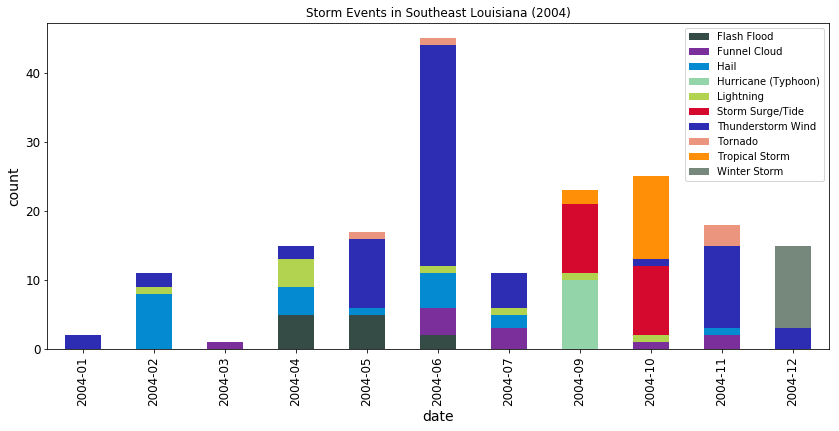

In [25]:
colors = ["#344b46", "#7a2f9b", "#048ad1", "#93d5a9", "#b1d34f", "#d5082d", "#2D2DB4", "#eb957f", "#fe8f06", 
          "#75887b"]
storm_df[(storm_df.date.dt.year == 2004) & (storm_df.region == 'Southeast')].groupby(['date', 'event_type']) \
                                                                           [['event_count']].sum() \
                                                                            .unstack() \
                                                                            .plot(kind='bar', stacked=True,
                                                                                  color=colors)
plt.ylabel('count')
plt.title('Storm Events in Southeast Louisiana (2004)')
_ = plt.legend(['Flash Flood', 'Funnel Cloud', 'Hail', 'Hurricane (Typhoon)', 'Lightning', 'Storm Surge/Tide', 
                'Thunderstorm Wind', 'Tornado', 'Tropical Storm', 'Winter Storm'])

### What happened in Northeast Louisiana in 2006?

In [26]:
storm_df[(storm_df.date.dt.year == 2006) & (storm_df.region == 'Northeast')].groupby('event_type')[['event_count']] \
                                                                          .sum() \
                                                                          .sort_values(by='event_count', 
                                                                                       ascending=False)

,event_count
event_type,
Hail,69
Thunderstorm Wind,68
Flash Flood,14
Drought,9
Heat,9
Tornado,8
Funnel Cloud,3
Ice Storm,3
Winter Weather,3


#### Of interest:
- High number of **hail** events in February, April, and May
- **Thunderstorm events** throughout the year mainly in March, April, May, July, August, October, and November
- **Heat** in July
- **Drought** in October

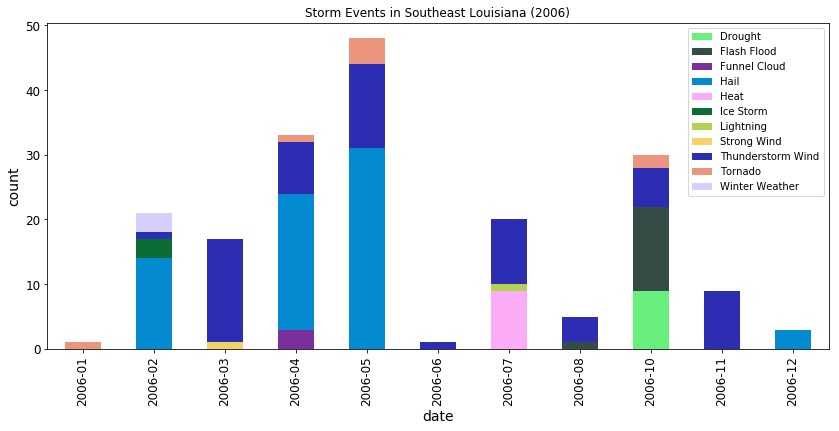

In [27]:
colors = ["#69ef7b", "#344b46", "#7a2f9b", "#048ad1", "#fbacf6", "#0b6d33", "#b1d34f", "#f4d16a", "#2D2DB4", 
          "#eb957f", "#d5d0fa"]
storm_df[(storm_df.date.dt.year == 2006) & (storm_df.region == 'Northeast')].groupby(['date', 'event_type']) \
                                                                            [['event_count']].sum() \
                                                                            .unstack() \
                                                                            .plot(kind='bar', stacked=True, color=colors)
plt.ylabel('count')
plt.title('Storm Events in Southeast Louisiana (2006)')
_ = plt.legend(['Drought', 'Flash Flood', 'Funnel Cloud', 'Hail', 'Heat', 'Ice Storm', 'Lightning', 'Strong Wind',
                'Thunderstorm Wind', 'Tornado', 'Winter Weather'])

# Map Visualization

In [28]:
def plot(year, parameter):
    df_sample = df[df.date.dt.year == year]
    values = df_sample[parameter].tolist()
    fips = df_sample['fips'].tolist()
    
    if parameter in ['event_count', 'deaths_indirect', 'deaths_direct', 'injuries_indirect',' injuries_direct',
                     'damage_property']:
        endpts = list(np.mgrid[1:max(values):6j])
    else:
        endpts = list(np.mgrid[min(values):max(values):6j])
    colorscale = ['#fff7fb','#ece7f2','#d0d1e6','#a6bddb','#74a9cf','#3690c0','#0570b0','#045a8d','#023858']
    fig = ff.create_choropleth(
        fips=fips, values=values, scope=['Louisiana'], show_state_data=True,
        colorscale=colorscale, binning_endpoints=endpts, 
        round_legend_values=True,
        plot_bgcolor='rgb(229,229,229)',
        paper_bgcolor='rgb(229,229,229)',
        legend_title=parameter+' by Parish',
        county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
        #exponent_format=True,
    )
    fig.layout.template = None
    fig.show()
    
#plot(2010, 'event_count')
_ = interact(plot, year=range(1950, 2019), parameter=df.columns.tolist()[6:], sort=True)

interactive(children=(Dropdown(description='year', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 19…